How I ran: <br>
1. clone https://github.com/amazon-science/chronos-forecasting
2. put this file in project root folder
3. get datasets from google drive folder and put in data folder in project root folder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from src.chronos import ChronosPipeline

c:\Users\msuehle\Documents\College\CMSC828A\chronos-forecasting\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [29]:
df["column"] = 2
df

,Month,#Passengers,column
0,1949-01,112,2
1,1949-02,118,2
2,1949-03,132,2
3,1949-04,129,2
4,1949-05,121,2
...,...,...,...
139,1960-08,606,2
140,1960-09,508,2
141,1960-10,461,2
142,1960-11,390,2


In [30]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor([df["#Passengers"], df['column']])
prediction_length = 12
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,
    temperature=1.0,
    top_k=50,
    top_p=1.0,
) # forecast shape: [num_series, num_samples, prediction_length]


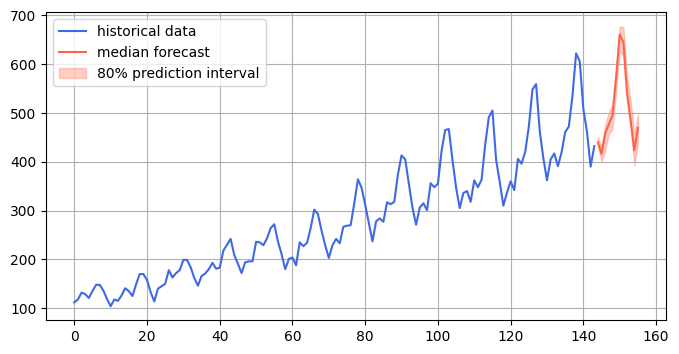

In [31]:
# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [32]:
median

array([439.76480103, 416.13241577, 458.25956726, 476.75419617,
       495.24894714, 572.31063843, 660.67449951, 645.26226807,
       542.51348877, 484.97421265, 423.32501221, 469.56184387])

In [19]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor([df["#Passengers"], df["column"]])
embeddings, tokenizer_state = pipeline.embed(context)

In [20]:
embeddings

tensor([[[ 0.0408,  0.0236,  0.0098,  ...,  0.0152,  0.0237, -0.0018],
         [ 0.0299, -0.0315,  0.0388,  ...,  0.0347,  0.0178, -0.0016],
         [-0.0239,  0.0167,  0.0408,  ...,  0.0488,  0.0052,  0.0203],
         ...,
         [ 0.0569,  0.0231,  0.0063,  ..., -0.1074,  0.0008, -0.0070],
         [-0.0325, -0.0325, -0.0060,  ..., -0.0718, -0.0034,  0.0277],
         [ 0.0072,  0.0172, -0.0175,  ..., -0.0034, -0.0121,  0.0309]],

        [[-0.0072, -0.0248, -0.0176,  ...,  0.0017,  0.0128,  0.0085],
         [-0.0067, -0.0248, -0.0176,  ...,  0.0020,  0.0119,  0.0083],
         [-0.0069, -0.0244, -0.0171,  ...,  0.0022,  0.0117,  0.0080],
         ...,
         [ 0.0113, -0.0270, -0.0444,  ..., -0.0104,  0.0008,  0.0092],
         [ 0.0093, -0.0479, -0.0613,  ..., -0.0101, -0.0030,  0.0073],
         [ 0.0007,  0.0064, -0.0184,  ...,  0.0471, -0.0010, -0.0025]]],
       dtype=torch.bfloat16)

<h4> now try with different dataset </h4>

In [4]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

In [5]:
df = pd.read_csv(r"data\amazon_stock.csv")

In [10]:
df.iloc[:-20]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-10,93.543999,94.713501,90.908501,94.591003,94.591003,142666000
1,2020-03-11,92.892502,93.566002,90.074997,91.042999,91.042999,112496000
2,2020-03-12,86.098999,88.250000,83.750000,83.830498,83.830498,226924000
3,2020-03-13,87.750000,89.315498,84.030998,89.250000,89.250000,176194000
4,2020-03-16,82.075500,87.972504,81.301498,84.457497,84.457497,178346000
...,...,...,...,...,...,...,...
1008,2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600
1009,2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600
1010,2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800
1011,2024-03-15,176.639999,177.929993,173.899994,174.419998,174.419998,72115500


In [11]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor([df["Open"].iloc[:-30]]) # reserve last 30 for testing
prediction_length = 30
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,
    temperature=1.0,
    top_k=50,
    top_p=1.0,
) # forecast shape: [num_series, num_samples, prediction_length]

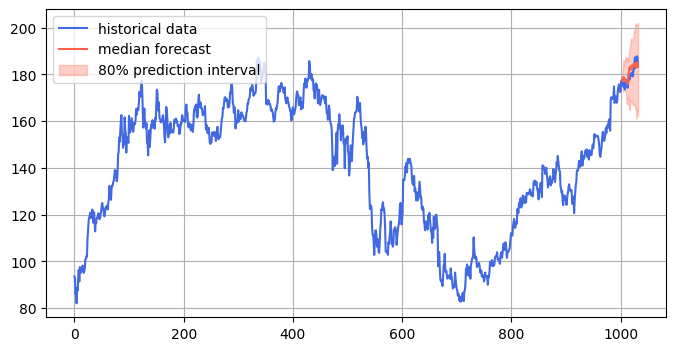

In [15]:
# visualize the forecast
forecast_index = range(len(df.iloc[:-30]), len(df.iloc[:-30]) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["Open"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [16]:
df['Open'].iloc[-30:]

1003    176.929993
1004    175.539993
1005    174.830002
1006    176.440002
1007    174.309998
1008    173.500000
1009    175.899994
1010    177.690002
1011    176.639999
1012    175.800003
1013    174.220001
1014    176.139999
1015    179.990005
1016    177.750000
1017    178.009995
1018    180.149994
1019    179.880005
1020    180.169998
1021    180.789993
1022    179.070007
1023    179.899994
1024    184.000000
1025    182.380005
1026    186.899994
1027    187.240005
1028    182.770004
1029    186.740005
1030    187.720001
1031    187.429993
1032    183.270004
Name: Open, dtype: float64

In [14]:
median

array([177.33902639, 177.79723658, 178.71377617, 178.71371656,
       177.33902639, 177.79723658, 177.79729619, 177.33902639,
       176.8808162 , 176.8808162 , 175.96427661, 177.33902639,
       180.54673615, 182.83790631, 182.37969612, 183.29617611,
       181.92142632, 182.83790631, 183.2961165 , 184.21265609,
       184.21265609, 183.75438629, 183.29617611, 183.75438629,
       184.67086628, 182.83790631, 184.67086628, 185.12907647,
       184.21265609, 183.29617611])

In [17]:
#loss
np.array(df['Open'].iloc[-30:]) - np.array(median)

array([-0.40903371, -2.25724329, -3.88377434, -2.27371412, -3.02902883,
       -4.29723658, -1.89730229,  0.35097605, -0.24081681, -1.08081315,
       -1.74427539, -1.199027  , -0.55673065, -5.08790631, -4.36970161,
       -3.14618221, -2.04142144, -2.66790814, -2.50612321, -5.14264877,
       -4.3126622 ,  0.24561371, -0.91617122,  3.1456076 ,  2.56913921,
       -0.06790204,  2.06913921,  2.59092475,  3.21733658, -0.02617183])

In [18]:
layoff_df = pd.read_csv(r"data\layoffs.csv")
layoff_df = layoff_df.rename(columns={"date":"Date"})

In [42]:
layoff_df['industry'].value_counts()

industry
Finance           441
Retail            296
Healthcare        286
Other             218
Transportation    215
Food              207
Consumer          202
Marketing         174
Real Estate       150
Crypto            142
Education         140
Media             137
Security          121
Data              116
HR                 95
Travel             94
Infrastructure     64
Logistics          64
Sales              55
Support            53
Hardware           49
Recruiting         48
Product            46
Fitness            41
Energy             29
Construction       24
Legal              18
Manufacturing      17
Aerospace          15
AI                 10
Name: count, dtype: int64

In [19]:
layoff_df_retail = layoff_df.loc[layoff_df['industry'] == "Retail"]
total_layoffs = layoff_df_retail[["Date","total_laid_off"]].groupby("Date").sum().reset_index()
total_layoffs

,Date,total_laid_off
0,2020-03-12,20.0
1,2020-03-19,0.0
2,2020-03-23,91.0
3,2020-03-24,0.0
4,2020-03-25,0.0
...,...,...
223,2024-02-26,0.0
224,2024-03-19,195.0
225,2024-04-03,280.0
226,2024-04-08,79.0


In [20]:
merged_df = pd.merge(df, total_layoffs, on="Date", how="outer").fillna(0)

In [49]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,total_laid_off
0,2020-03-10,93.543999,94.713501,90.908501,94.591003,94.591003,142666000.0,0.0
1,2020-03-11,92.892502,93.566002,90.074997,91.042999,91.042999,112496000.0,0.0
2,2020-03-12,86.098999,88.250000,83.750000,83.830498,83.830498,226924000.0,20.0
3,2020-03-13,87.750000,89.315498,84.030998,89.250000,89.250000,176194000.0,0.0
4,2020-03-16,82.075500,87.972504,81.301498,84.457497,84.457497,178346000.0,0.0
...,...,...,...,...,...,...,...,...
1040,2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700.0,0.0
1041,2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300.0,0.0
1042,2024-04-15,187.429993,188.690002,183.000000,183.619995,183.619995,48052400.0,0.0
1043,2024-04-16,183.270004,184.830002,182.259995,183.320007,183.320007,32891300.0,0.0


In [21]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor([merged_df["total_laid_off"].iloc[:-30]])
prediction_length = 30
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,
    temperature=1.0,
    top_k=50,
    top_p=1.0,
) # forecast shape: [num_series, num_samples, prediction_length]

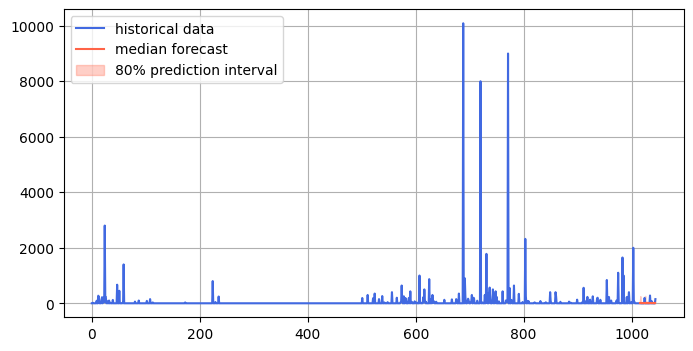

In [22]:
# visualize the forecast
forecast_index = range(len(merged_df.iloc[:-30]), len(merged_df.iloc[:-30]) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(merged_df["total_laid_off"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [25]:
# loss
np.mean(np.array(merged_df['total_laid_off'].iloc[-30:]) - np.array(high))

-16.406094696944265

In [26]:
np.mean(np.array(merged_df['total_laid_off'].iloc[-30:]) - np.array(median))

22.606420351068177

Try with run_chronos.py

In [3]:
import importlib
import run_chronos
importlib.reload(run_chronos)
from run_chronos import ChronosRunner
import pandas as pd

In [4]:
df = pd.read_csv(r"data\amazon_stock.csv")
layoff_df = pd.read_csv(r"data\layoffs.csv")
layoff_df = layoff_df.rename(columns={"date":"Date"})
layoff_df_retail = layoff_df.loc[layoff_df['industry'] == "Retail"]
total_layoffs = layoff_df_retail[["Date","total_laid_off"]].groupby("Date").sum().reset_index()
merged_df = pd.merge(df, total_layoffs, on="Date", how="outer")
merged_df["total_laid_off"] = merged_df["total_laid_off"].fillna(0)

In [15]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,total_laid_off
0,2020-03-10,93.543999,94.713501,90.908501,94.591003,94.591003,142666000.0,0.0
1,2020-03-11,92.892502,93.566002,90.074997,91.042999,91.042999,112496000.0,0.0
2,2020-03-12,86.098999,88.250000,83.750000,83.830498,83.830498,226924000.0,20.0
3,2020-03-13,87.750000,89.315498,84.030998,89.250000,89.250000,176194000.0,0.0
4,2020-03-16,82.075500,87.972504,81.301498,84.457497,84.457497,178346000.0,0.0
...,...,...,...,...,...,...,...,...
1041,2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300.0,0.0
1042,2024-04-15,187.429993,188.690002,183.000000,183.619995,183.619995,48052400.0,0.0
1043,2024-04-16,183.270004,184.830002,182.259995,183.320007,183.320007,32891300.0,0.0
1044,2024-04-17,184.309998,184.570007,179.820007,181.279999,181.279999,31359700.0,0.0


c:\Users\msuehle\Documents\College\CMSC828A\CMSC828A_Final_Proj\env\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'lloss': 12.170440588995913,
 'mloss': 4.7263298415673844,
 'hloss': 6.783547500998119,
 'labels': array([176.92999268, 175.53999329, 174.83000183, 176.44000244,
        174.30999756, 173.5       , 175.8999939 , 177.69000244,
        176.63999939, 175.80000305, 174.22000122, 176.13999939,
        179.99000549, 177.75      , 178.00999451, 180.1499939 ,
        179.88000488, 180.16999817, 180.78999329, 179.07000732,
        179.8999939 , 184.        , 182.38000488, 186.8999939 ,
        187.24000549, 182.77000427, 186.74000549, 187.72000122,
        187.42999268, 183.27000427]),
 'low': array([173.21489625, 175.04785623, 175.32274658, 174.86456023,
        174.13131663, 173.1232423 , 171.29028232, 169.54897631,
        168.63243671, 170.37375465, 171.29028232, 170.46539669,
        171.29028232, 170.28210069, 168.54079468, 167.62436238,
        168.44914072, 166.61618074, 168.54079468, 166.79947674,
        170.19045865, 169.45732235, 167.62436238, 166.61618074,
        166.7078347 , 16

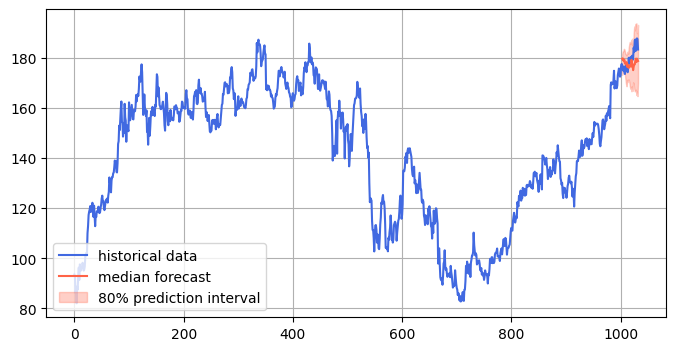

In [5]:
cr = ChronosRunner()
cr.evaluate(merged_df.loc[~merged_df["Open"].isna()].reset_index(), "Open")

[69.27649286238017, 69.27649286238017, 329.7335697548615]

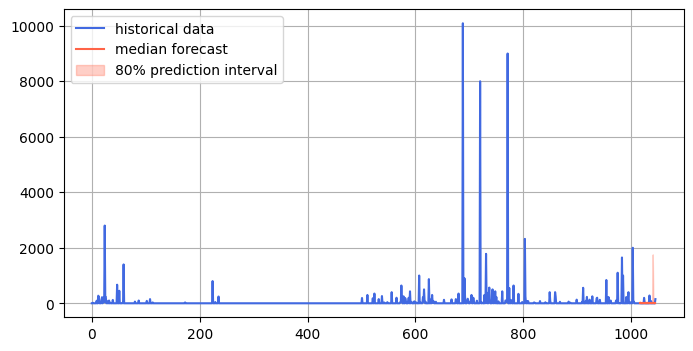

In [22]:
cr.evaluate(merged_df, "total_laid_off")